# Project Overview



*   In this project, we will build a simple machine learning model that uses only 1 neuron to learn the equation to convert celsius to fahrenheit.


*   The equation is as follows: T('F) = T('C) * 9/5 + 32







In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1 Import Datasets

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
temp_df = pd.read_csv('/content/drive/MyDrive/Data_files/Celsius+to+Fahrenheit.csv')

In [4]:
temp_df.head(5)   #viewing the dataset

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [7]:
temp_df.info() #Checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


# Step 2 Visualize Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


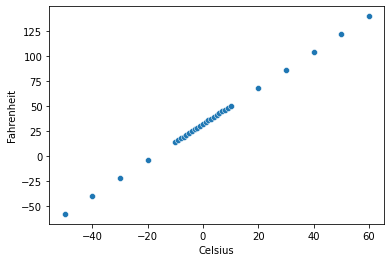

In [8]:
sns.scatterplot(temp_df['Celsius'], temp_df['Fahrenheit'])    #X, Y  axis

# Step 3 Create Testing and Training Dataset

In [9]:
X_train = temp_df['Celsius']  #input
y_train = temp_df['Fahrenheit']   #output

# Step 4 Build and Train the Model

In [10]:
X_train.shape

(30,)

In [11]:
y_train.shape

(30,)

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))   #units is the number of neurons, input shape is 1 because we only have 1 input(Celsius). 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss= 'mean_squared_error')  #0.05 is learning rate

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 700)   #training the model

# Step 5 Evaluate the Model

In [16]:
epochs_hist.history.keys()

dict_keys(['loss'])

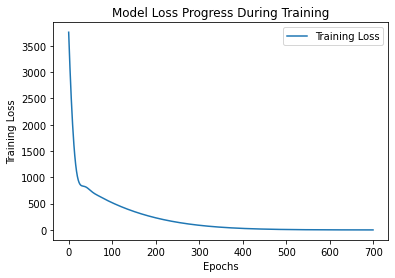

In [17]:
plt.plot(epochs_hist.history['loss'])                #plotting the loss
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])                        #title, xlabel, ylabel, and legend are optional. we can still visualize the loss only using plt.plot
                                                     #Looks like we only needed about 450-500 epochs to get the weight and bias we needed

In [18]:
#seeing the weights and biases

model.get_weights()                   # Showing the weight and bias. These make sense because going back to the equation to find F (T('F) = T('C) * 9/5 + 32)
                                      # the weight is very close to 9/5 and the bias is very close to 32

[array([[1.802336]], dtype=float32), array([31.419754], dtype=float32)]

In [22]:
Temp_C = 5                          #test variable

Temp_F = model.predict([Temp_C])    #inputing our test variable into the model
print('Temperature in Degrees Fahrenheit the Model is: ', Temp_F)

Temperature in Degrees Fahrenheit the Model is:  [[40.431435]]


In [23]:
z = Temp_C * 9/5 + 32
print('Temperature in Degrees Fahrenheit Using hard code is: ', z)

Temperature in Degrees Fahrenheit Using hard code is:  41.0
